# Crimes in India

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('crime_dataset_india.csv')
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


#### Key feature in the dataset is crime code which can be used to train the ML model to predict how much time will it take to close the case  and aslo what age group can be the part of this etc.

In [6]:
df2 = pd.read_csv('crime_dataset_india.csv')
df2.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [8]:
df.shape

(40160, 14)

In [9]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [10]:
len(df)

40160

In [11]:
df.isnull().sum()*100/len(df)

Report Number          0.000000
Date Reported          0.000000
Date of Occurrence     0.000000
Time of Occurrence     0.000000
City                   0.000000
Crime Code             0.000000
Crime Description      0.000000
Victim Age             0.000000
Victim Gender          0.000000
Weapon Used           14.417331
Crime Domain           0.000000
Police Deployed        0.000000
Case Closed            0.000000
Date Case Closed      50.044821
dtype: float64

In [12]:
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')

In [13]:
df['Date Case Closed'] = df['Date Case Closed'].fillna(pd.to_datetime('2050-01-01'))

In [14]:
df.isnull().sum()

Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64

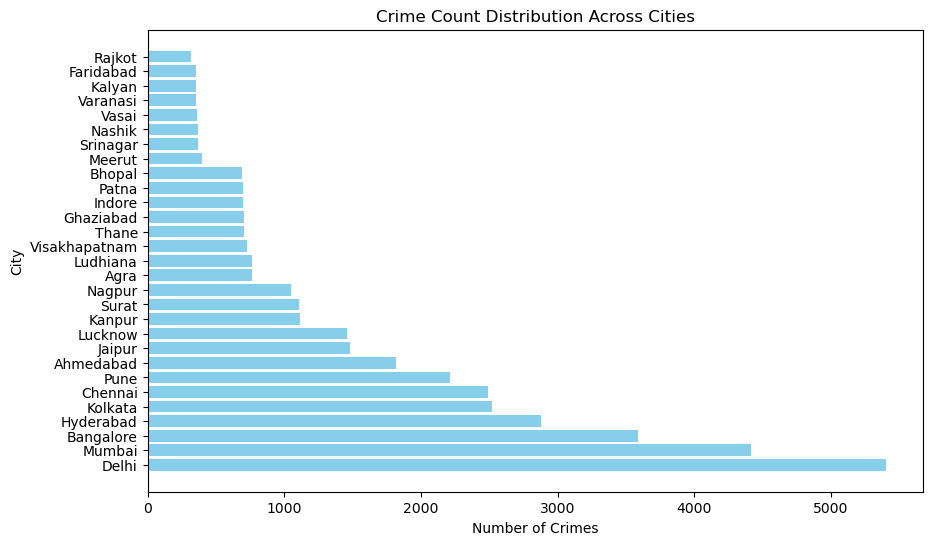

In [15]:
# Assuming df['City'] exists and counts crimes in each city
crime_city_count = df['City'].value_counts().reset_index()
crime_city_count.columns = ['City', 'Crime Count']  # Check if the column names match

# Plot the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(crime_city_count['City'], crime_city_count['Crime Count'], color='skyblue')

plt.title('Crime Count Distribution Across Cities')
plt.xlabel('Number of Crimes')
plt.ylabel('City')

# Show the plot
plt.show()



Top 10 Cities with Highest Crime Counts:
City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64


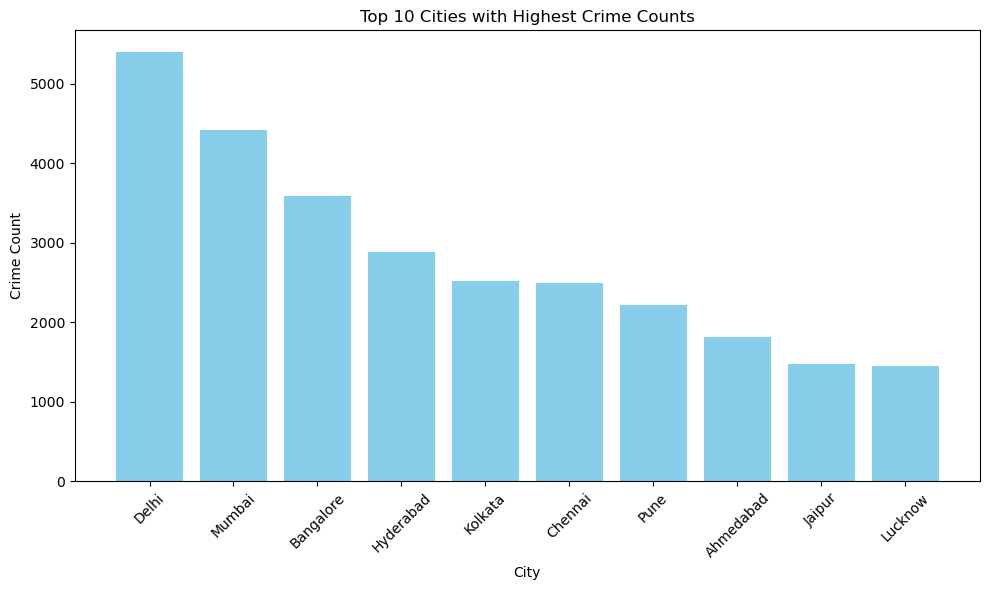

In [16]:
top_cities = df['City'].value_counts().head(10)
print("Top 10 Cities with Highest Crime Counts:")
print(top_cities)


crime_city_count = df['City'].value_counts().reset_index()
crime_city_count.columns = ['City', 'Crime Count']

top_cities_plot = crime_city_count.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_cities_plot['City'], top_cities_plot['Crime Count'], color='skyblue')

plt.title('Top 10 Cities with Highest Crime Counts')
plt.xlabel('City')
plt.ylabel('Crime Count')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


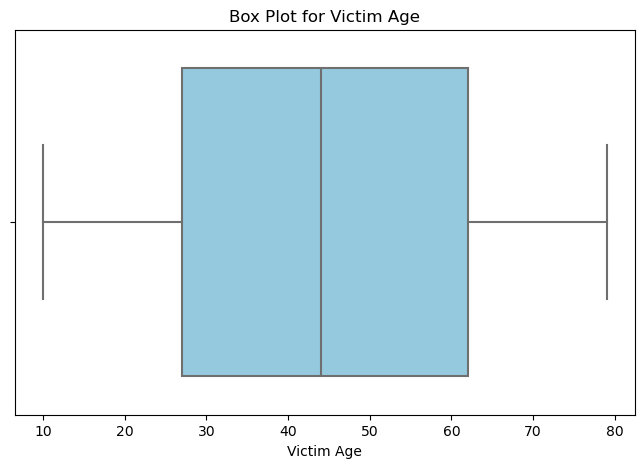

In [17]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=df['Victim Age'], color='skyblue') 
plt.title('Box Plot for Victim Age') 
plt.show()

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


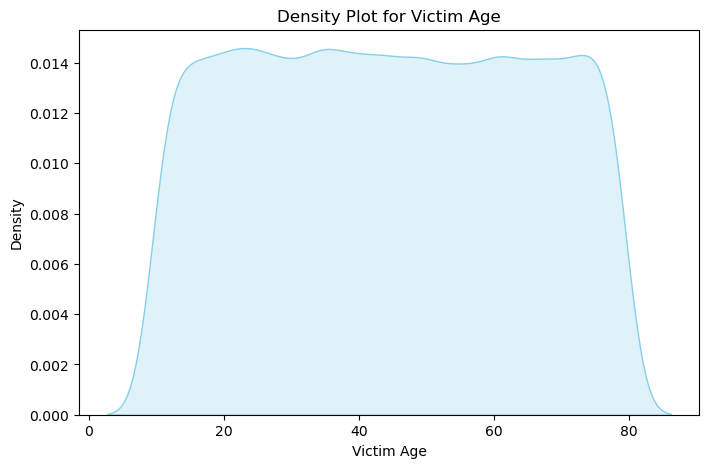

In [18]:
plt.figure(figsize=(8, 5)) 
sns.kdeplot(df['Victim Age'], fill=True, color='skyblue')

 
plt.title('Density Plot for Victim Age') 
plt.show()

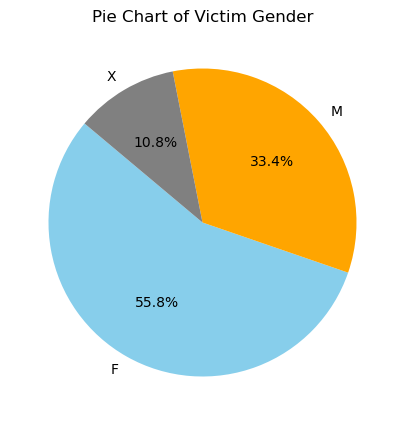

In [19]:
plt.figure(figsize=(8, 5)) 
df['Victim Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'Orange','grey'], startangle=140) 
 
# Adding labels and title 
plt.title('Pie Chart of Victim Gender') 
plt.ylabel('') 
plt.show()

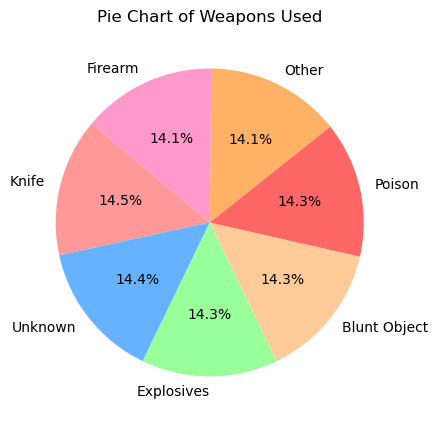

In [20]:
plt.figure(figsize=(8, 5)) 
df['Weapon Used'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', 
'#FFCC99', '#FF6666', '#FFB266', '#FF99CC'], startangle=140) 
 
# Adding labels and title 
plt.title('Pie Chart of Weapons Used') 
plt.ylabel('') 
plt.show()

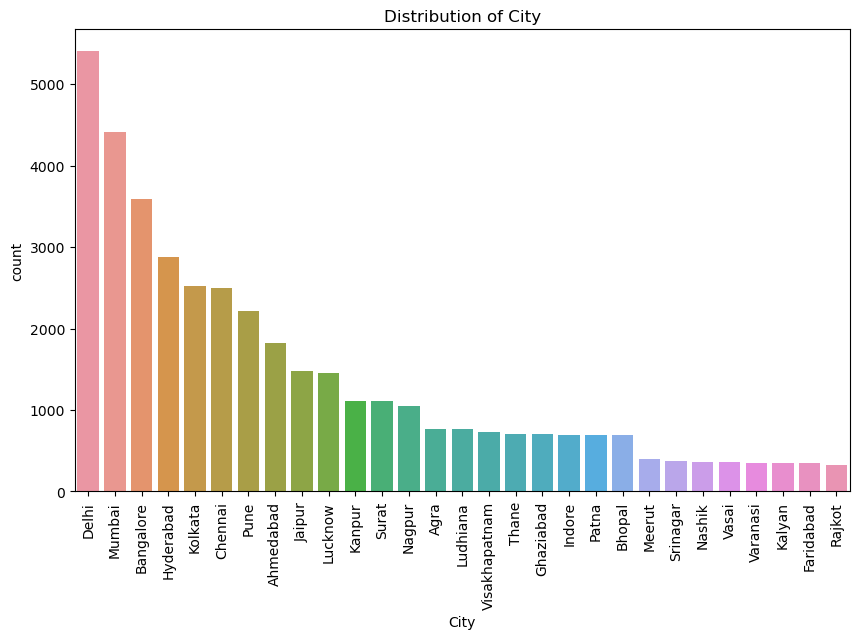

In [24]:
# Bar plots for categorical features
categorical_features = ['City']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

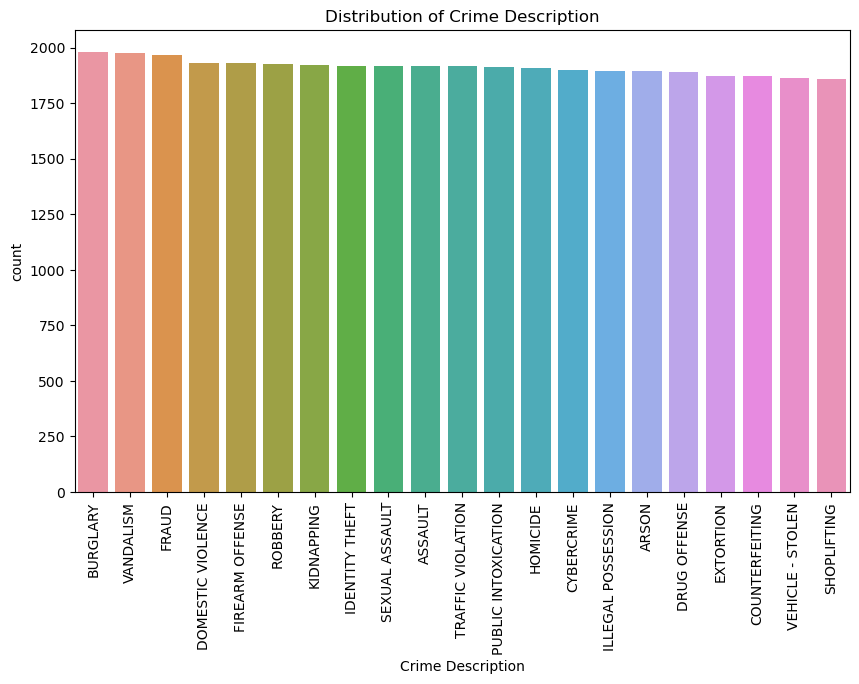

In [25]:
# Bar plots for categorical features
categorical_features = [ 'Crime Description']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

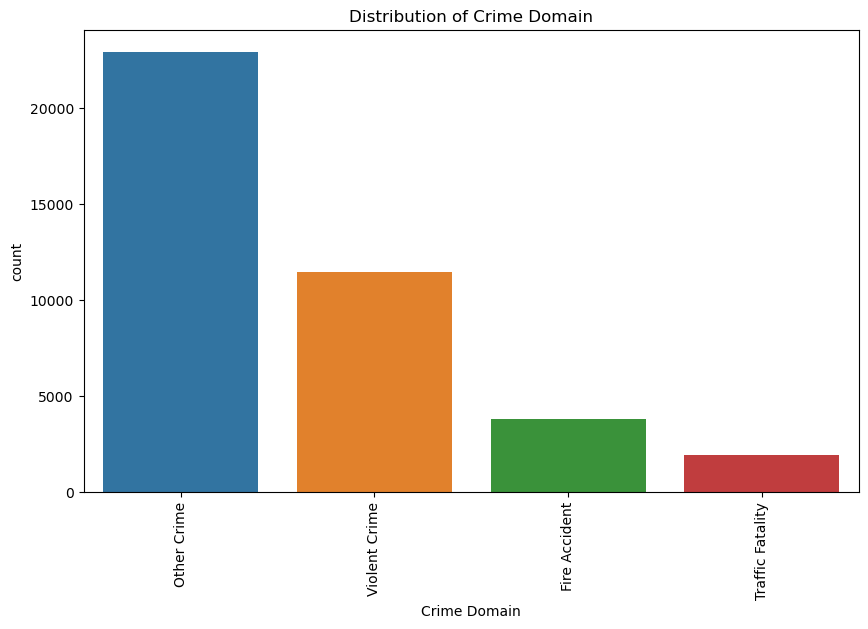

In [27]:
# Bar plots for categorical features
categorical_features = ['Crime Domain']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Multivariate Analysis


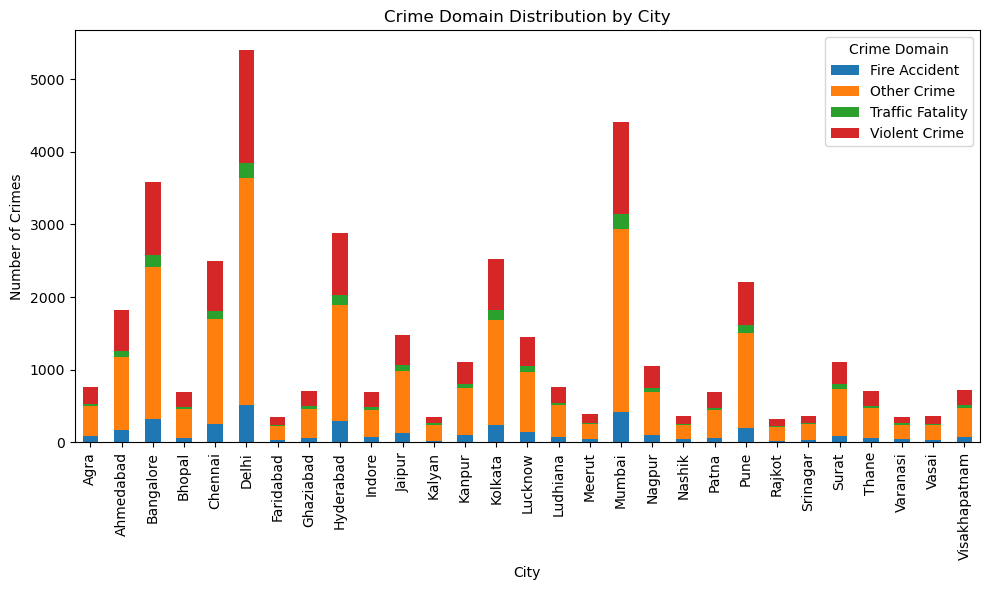

In [39]:

# Assuming crime_domain_by_city is already created from the crime_df
crime_domain_by_city = df.groupby(['City', 'Crime Domain']).size().reset_index(name='Count')

# Pivot the data to have Crime Domains as columns and Cities as index
pivot_df = crime_domain_by_city.pivot(index='City', columns='Crime Domain', values='Count').fillna(0)

# Create the stacked bar plot using Matplotlib
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))



plt.title('Crime Domain Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Crimes')

plt.legend(title='Crime Domain')
plt.tight_layout()
plt.show()


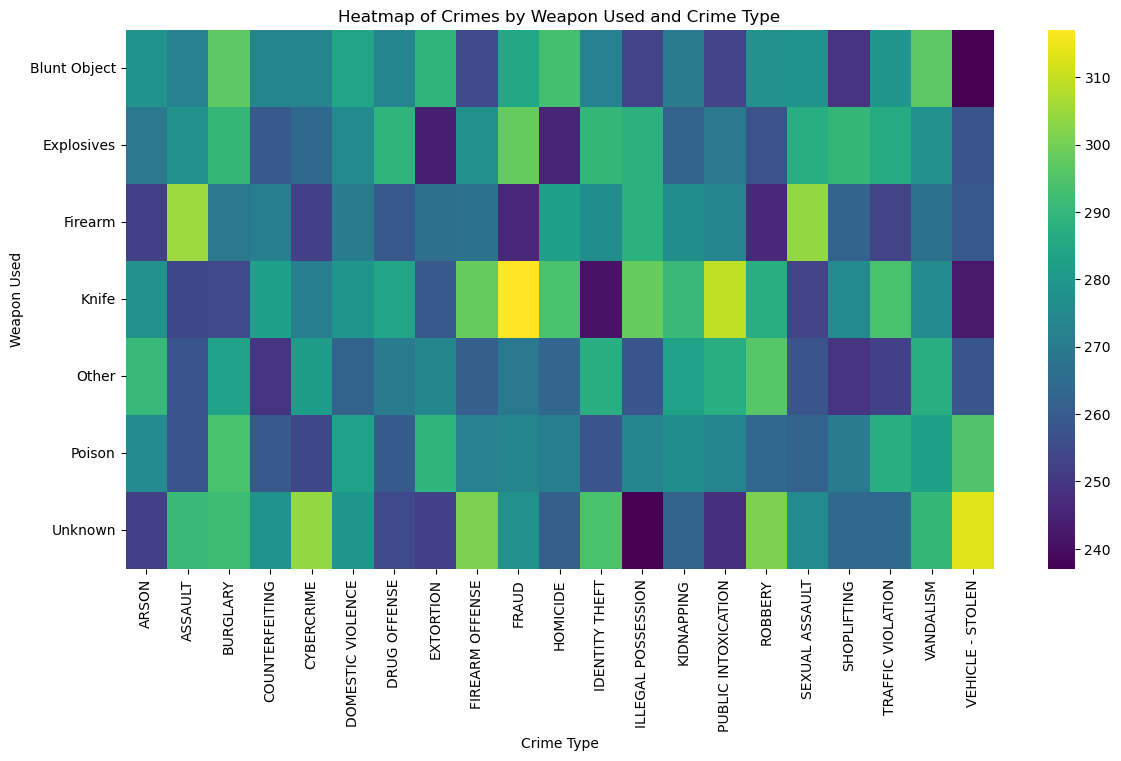

In [35]:
# Analyze correlation with crime types
# Aggregate data
weapon_crime_type = df.groupby(['Weapon Used', 'Crime Description'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = weapon_crime_type.pivot_table(index='Weapon Used', columns='Crime Description', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=False)
plt.title('Heatmap of Crimes by Weapon Used and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Weapon Used')
plt.show()

# Analyze correlation with victim demographics
# Ensure 'victim_age' is numeric
df['Victim Age'] = pd.to_numeric(df['Victim Age'], errors='coerce')
data = df.dropna(subset=['Victim Age'])

# Create age groups
bins = [0, 12, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']  # Define labels
df['Victim Age'] = pd.cut(df['Victim Age'], bins=bins, labels=labels, right=False)

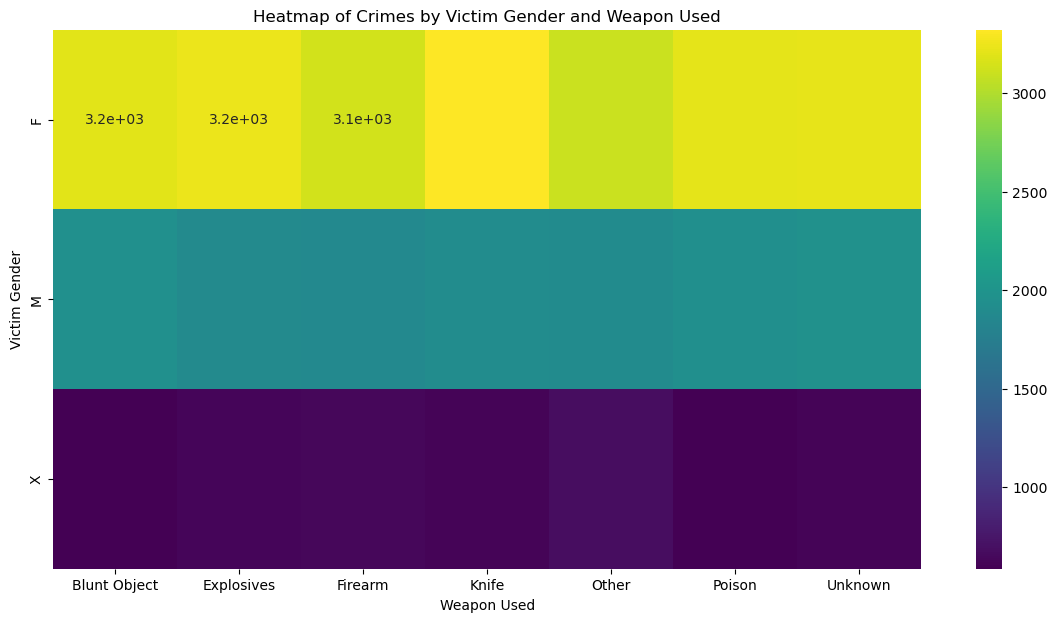

In [36]:
# Analyze correlation with weapon used

# Aggregate data
gender_weapon = df.groupby(['Victim Gender', 'Weapon Used'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = gender_weapon.pivot_table(index='Victim Gender', columns='Weapon Used', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Victim Gender and Weapon Used')
plt.xlabel('Weapon Used')
plt.ylabel('Victim Gender')
plt.show()

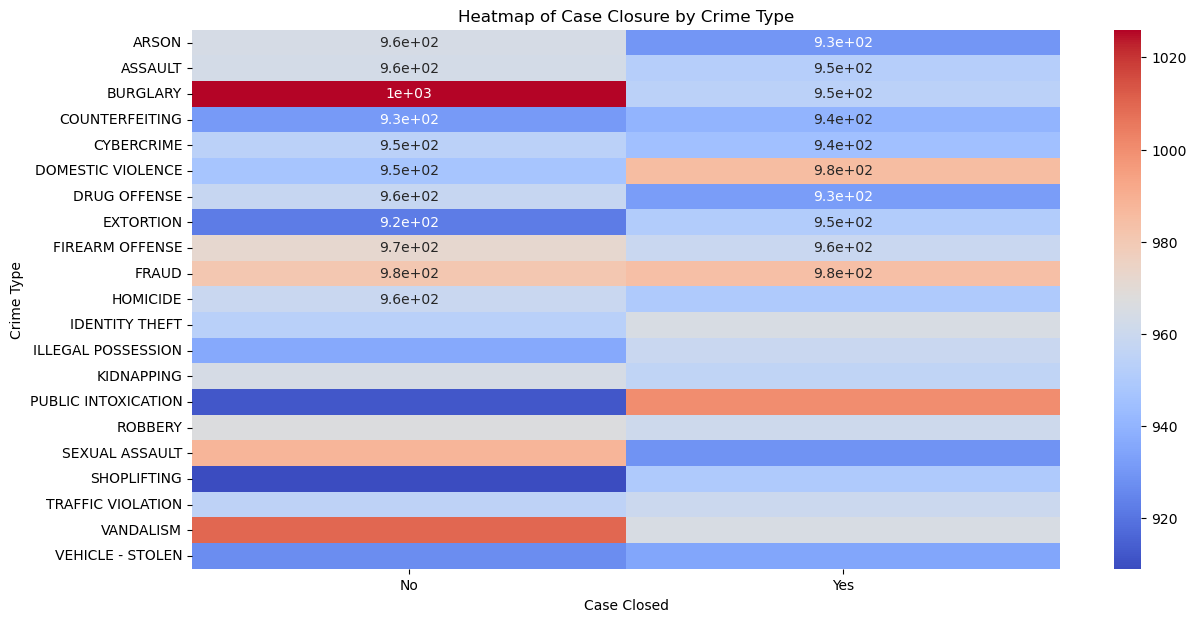

In [37]:
# Case Closure by Crime Type
closure_crime_type = df.groupby(['Crime Description', 'Case Closed'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.heatmap(closure_crime_type.pivot_table(index='Crime Description', columns='Case Closed', values='count', fill_value=0), cmap='coolwarm', annot=True)
plt.title('Heatmap of Case Closure by Crime Type')
plt.xlabel('Case Closed')
plt.ylabel('Crime Type')
plt.show()

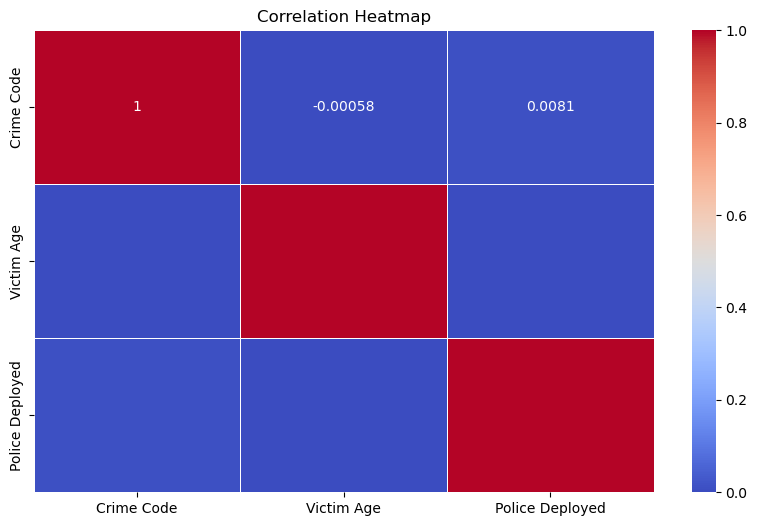

In [44]:

label_encoder = LabelEncoder()
df['Victim Age'] = label_encoder.fit_transform(df['Victim Age'])


df['Crime Code'] = label_encoder.fit_transform(df['Crime Code'])
df['Police Deployed'] = label_encoder.fit_transform(df['Police Deployed'])

 
correlation_matrix = df[['Crime Code', 'Victim Age', 'Police Deployed']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


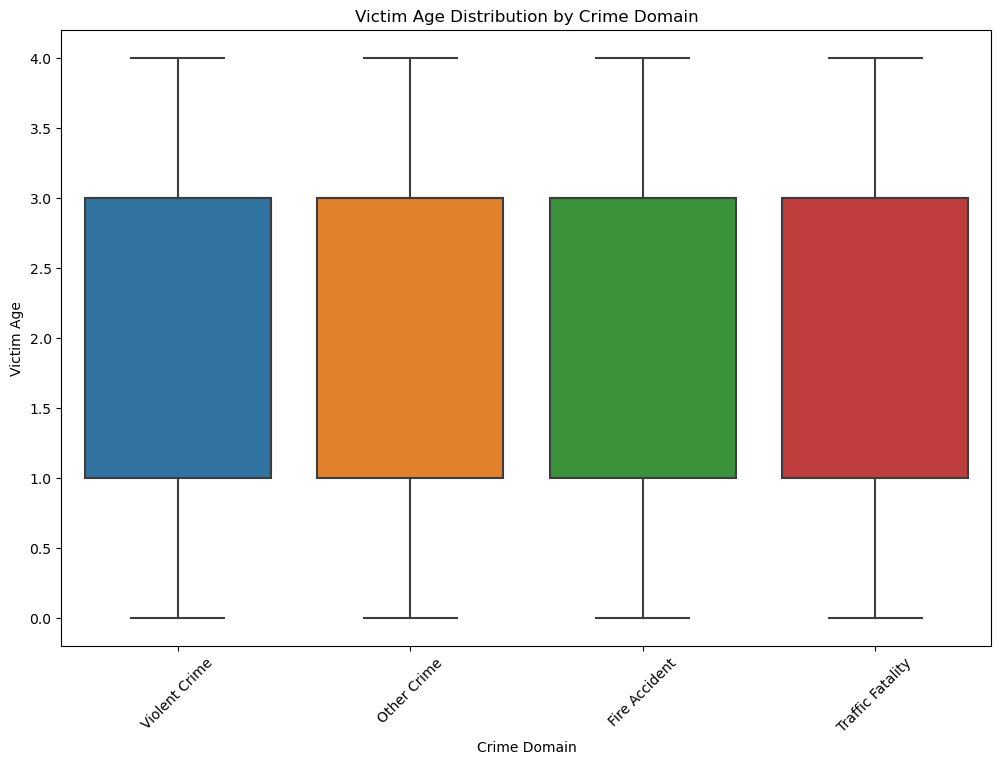

In [46]:


df['Victim Age'] = pd.to_numeric(df['Victim Age'], errors='coerce')

# Now plot the boxplot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crime Domain', y='Victim Age', data=df)
plt.title('Victim Age Distribution by Crime Domain')
plt.xticks(rotation=45)
plt.show()


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

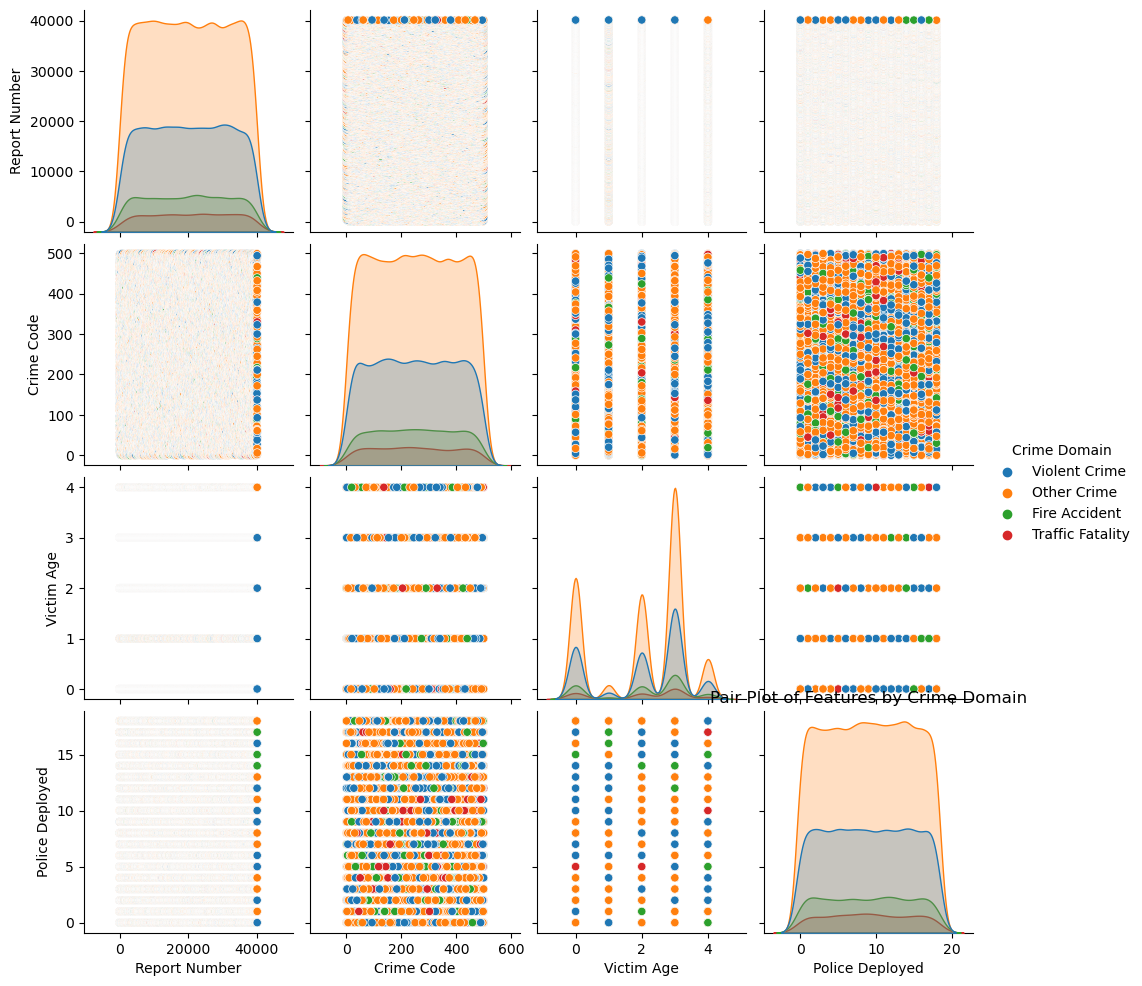

In [47]:
sns.pairplot(df, hue='Crime Domain') 
plt.title('Pair Plot of Features by Crime Domain')
plt.show()


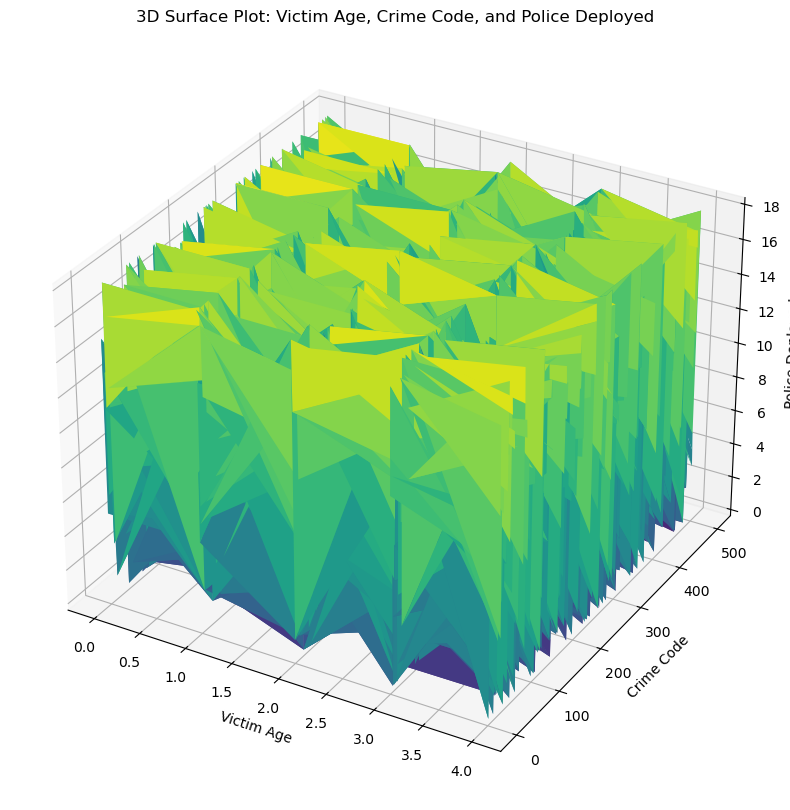

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(df['Victim Age'], df['Crime Code'])
Z = df['Police Deployed']

ax.plot_trisurf(df['Victim Age'], df['Crime Code'], df['Police Deployed'], cmap='viridis', edgecolor='none')

ax.set_xlabel('Victim Age')
ax.set_ylabel('Crime Code')
ax.set_zlabel('Police Deployed')

plt.title('3D Surface Plot: Victim Age, Crime Code, and Police Deployed')
plt.show()



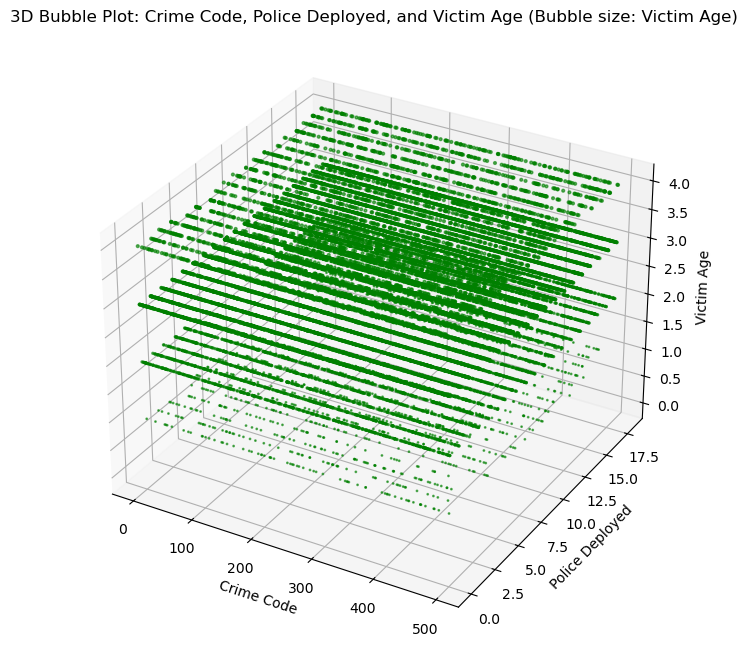

In [60]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

bubble_size = df['Victim Age'] 
ax.scatter(df['Crime Code'], df['Police Deployed'], df['Victim Age'], s=bubble_size, c='green', alpha=0.6)


ax.set_xlabel('Crime Code')
ax.set_ylabel('Police Deployed')
ax.set_zlabel('Victim Age')

plt.title('3D Bubble Plot: Crime Code, Police Deployed, and Victim Age (Bubble size: Victim Age)')
plt.show()
